In [9]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [10]:
df = pd.read_csv('../../../data/handlebar/processed_segments_overlap_50.csv') 
df.drop('Unnamed: 0', axis=1, inplace=True)
df


,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9312,1.0,-1.575378,5.295975,5.295975,16.682800,19.517532,14.781799,14.609421,7.469910,11.252747,...,-6.689407,2.274490,4.649536,-18.933350,-24.708160,-21.212631,-3.002335,10.764328,19.019547,19.871872
9313,1.0,0.100555,-6.871353,3.026276,17.348389,15.734695,13.632584,13.632584,14.556747,12.014099,...,-22.385788,-30.980972,-23.218964,-6.301544,14.973343,18.669983,26.542114,38.690308,48.295837,53.400284
9314,1.0,6.004654,9.461884,15.811310,22.572540,20.719421,20.719421,7.910446,0.928955,-0.574615,...,4.922485,19.182343,20.283676,20.283676,12.129028,-3.567368,-3.567368,1.077393,9.370911,10.749970
9315,1.0,60.429657,25.072083,9.495407,-14.068329,-19.512741,-11.065994,2.049438,2.049438,10.376465,...,0.210693,0.804459,0.804459,11.267120,10.807434,8.063675,4.228165,4.505890,19.072205,19.072205


In [11]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [12]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])



In [13]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,0.099842,0.367573,-0.760735,-0.741110,-0.643996,1.478013,1.460586,0.377973,-1.298170,-2.613329,...,-0.582613,-1.255213,-0.701392,0.471675,0.901263,0.321502,-0.614684,0.125772,0.418495,0.0
1,0.287473,-0.438213,-0.262225,-0.632199,0.733360,0.425447,0.325230,0.411709,-0.423649,0.776224,...,-0.527615,0.937265,1.770801,1.560933,-0.131658,-1.879847,-1.206281,-0.206123,0.528233,0.0
2,-0.889006,-0.240796,0.149586,0.175351,-0.117633,-0.764769,-1.020560,-0.874950,-0.199176,0.381914,...,-0.216459,-0.520273,-0.635812,-0.342957,0.028676,1.100680,0.824921,-0.265390,-0.858003,0.0
3,1.466225,1.286168,-0.577708,-1.422806,-0.696546,0.911753,0.885006,-0.045683,-1.041988,-0.455054,...,-3.053017,1.231087,2.014817,-2.399102,-6.967440,-6.682476,-0.651555,0.426846,-4.315520,0.0
4,-0.690028,-0.464805,1.045457,0.830425,0.002728,-1.053255,-0.338514,0.800059,0.798846,0.158502,...,-0.794318,-1.508160,-1.290846,0.791125,2.443709,1.781598,-0.239281,-0.758489,-0.189899,0.0


In [16]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]

In [17]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [18]:
from keras.models import Sequential
from keras.layers import Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model

# Define the autoencoder model using Sequential API
model = Sequential([
    # Encoder layers
    Input(shape=(100,)),  # Input shape based on your data
    Dense(256, activation='tanh'),
    Dense(224, activation='tanh'),
    Dense(160, activation='tanh'),
    
    # Decoder layers
    Dense(160, activation='tanh'),
    Dense(224, activation='tanh'),
    Dense(256, activation='tanh'),
    Dense(100, activation='tanh')  # Output shape matches input shape
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mae')

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │        57,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │        36,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 160)            │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 224)            │        36,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,548 (1.01 MB)

 Trainable params: 264,548 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
## Compile the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mae')

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │        57,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │        36,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 160)            │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 224)            │        36,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,548 (1.01 MB)

 Trainable params: 264,548 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=200, 
                    batch_size=512,
                    validation_split=0.3, 
                    shuffle=True, 
                    callbacks=[early_stopping])

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.4741 - val_loss: 0.4435
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4442 - val_loss: 0.4142
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4195 - val_loss: 0.3906
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3948 - val_loss: 0.3720
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3796 - val_loss: 0.3574
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3625 - val_loss: 0.3457
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3488 - val_loss: 0.3360
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3381 - val_loss: 0.3275
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3280 - val_loss: 0.3201
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3226 - val_loss: 0.3134
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3201 - val_loss: 0.3073
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

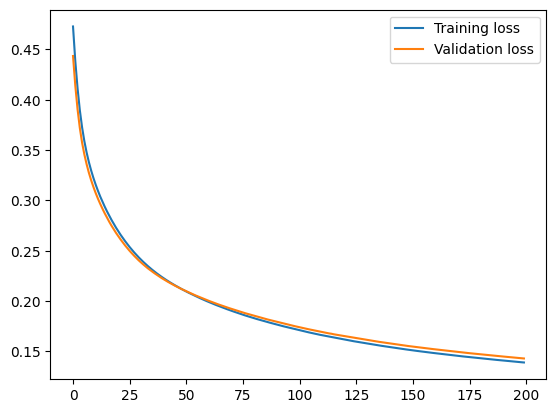

In [21]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [22]:
from keras import ops
model.save('../../../models/autoencoder_best.keras')

In [24]:
load_model = tf.keras.models.load_model('../../../models/autoencoder_best.keras')

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


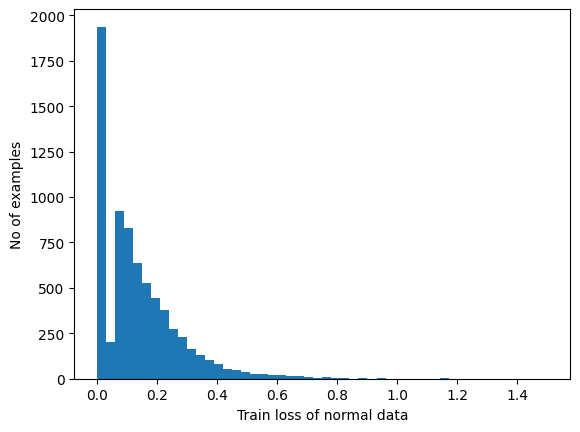

In [28]:
#Plot the reconstruction error on normal data from the training set
reconstructions_normal = load_model.predict(normal_train_data_scaled)
train_loss_normal = tf.keras.losses.mae(reconstructions_normal, normal_train_data_scaled)

plt.hist(train_loss_normal[None,:], bins=50)
plt.xlabel("Train loss of normal data")
plt.ylabel("No of examples")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


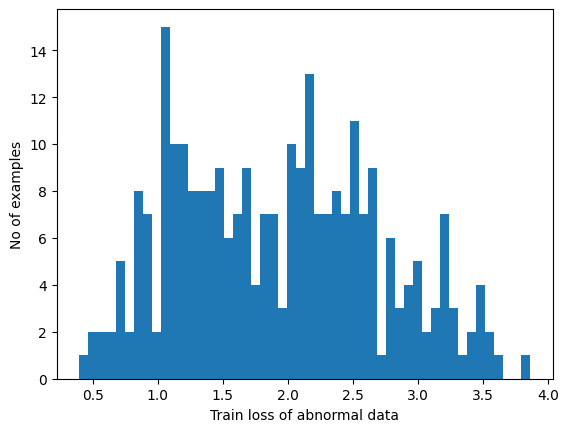

In [29]:
#Plot the reconstruction error on abnormal data from the training set
reconstructions_abnormal = load_model.predict(abnormal_train_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstructions_abnormal, abnormal_train_data_scaled)

plt.hist(train_loss_abnormal[None,:], bins=50)
plt.xlabel("Train loss of abnormal data")
plt.ylabel("No of examples")
plt.show()

In [ ]:
# Calculate threshold based on normal data statistics
# Common approach: mean + n*std of normal reconstruction errors
mean = np.mean(train_loss_normal)
std = np.std(train_loss_normal)
threshold = mean + 2 * std  

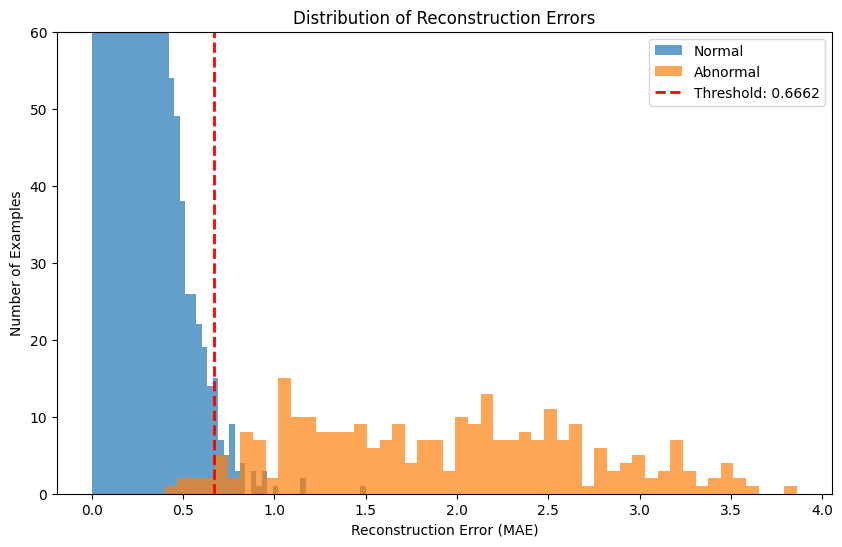

In [40]:
# Visualize threshold with histogram
plt.figure(figsize=(10, 6))
plt.hist(train_loss_normal, bins=50, alpha=0.7, label='Normal')
plt.hist(train_loss_abnormal, bins=50, alpha=0.7, label='Abnormal')
plt.ylim(0, 60)
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold:.4f}')
plt.xlabel('Reconstruction Error (MAE)')
plt.ylabel('Number of Examples')
plt.title('Distribution of Reconstruction Errors')
plt.legend()
plt.show()

In [ ]:
#Find best threshold using ROC and Precision-Recall curves
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np

# Prepare labels for evaluation
normal_labels = np.zeros(len(train_loss_normal))
abnormal_labels = np.ones(len(train_loss_abnormal))

# Combine reconstruction errors and labels
all_reconstruction_errors = np.concatenate([train_loss_normal, train_loss_abnormal])
all_labels = np.concatenate([normal_labels, abnormal_labels])

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(all_labels, all_reconstruction_errors)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(all_labels, all_reconstruction_errors)
pr_auc = auc(recall, precision)

# Find optimal threshold using Youden's J statistic
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds_roc[optimal_idx]

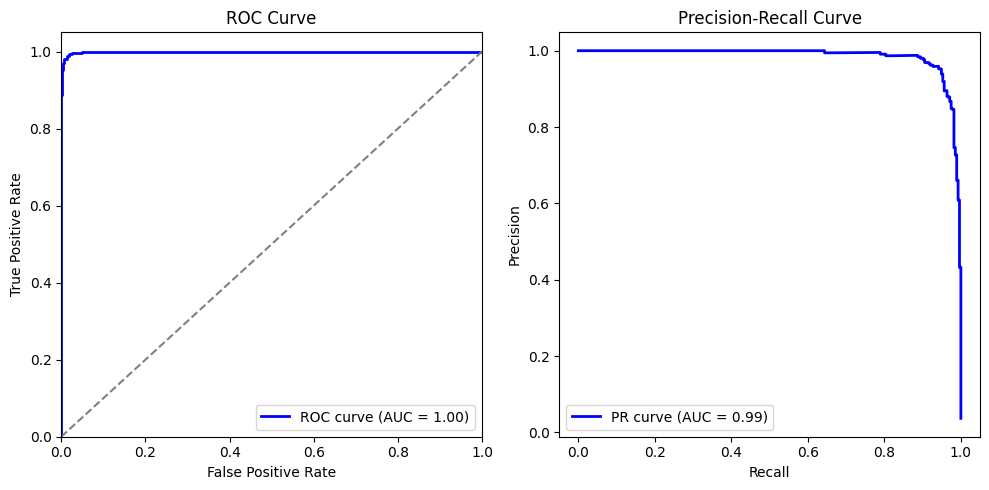

In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
# Print results
print(f"Optimal threshold: {optimal_threshold:.4f}")

# Evaluate performance with optimal threshold
y_pred = (all_reconstruction_errors > optimal_threshold).astype(int)
tn = np.sum((all_labels == 0) & (y_pred == 0))
fp = np.sum((all_labels == 0) & (y_pred == 1))
fn = np.sum((all_labels == 1) & (y_pred == 0))
tp = np.sum((all_labels == 1) & (y_pred == 1))

accuracy = (tp + tn) / len(all_labels)
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)

print("\nPerformance metrics with optimal threshold:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"Recall: {recall_score:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Optimal threshold: 0.6662

Performance metrics with optimal threshold:
Accuracy: 0.9926
Precision: 0.8459
Recall: 0.9782
F1-Score: 0.9073


In [42]:
# Save threshold
np.save('../../../models/autoencoder_threshold.npy', optimal_threshold)
print(f"Threshold {optimal_threshold:.4f} saved successfully")

Threshold 0.6662 saved successfully
